In [11]:
# Stephen.Griffies@noaa.gov 

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mplsettings

import cartopy.crs as ccrs

%matplotlib inline

In [13]:
dirstix = "../../common/static_ttf"
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [14]:
# datasets for p25
static_p25 = xr.open_mfdataset("../../common/CM4X_p25/ocean_annual.static.nc")
dsp25 = xr.open_mfdataset("CM4Xp25_tos_daily_std.nc")
tos_std_p25 = dsp25['tos']

area_p25      = static_p25['areacello']*static_p25['wet']
area_p25_xsum = area_p25.sum(dim='xh') 

In [15]:
# datasets for p125
static_p125 = xr.open_mfdataset("../../common/CM4X_p125/ocean_annual.static.nc")
dsp125     = xr.open_mfdataset("CM4Xp125_tos_daily_std.nc")
tos_std_p125 = dsp125['tos']

area_p125      = static_p125['areacello']*static_p125['wet']
area_p125_xsum = area_p125.sum(dim='xh') 

In [16]:
# datasets for Glorys12
dsglorys    = xr.open_mfdataset("GLORYS12V1_tos_daily_std.nc")
tos_std_glorys = dsglorys['tos']

In [17]:
tos_std_p25_area = tos_std_p25*area_p25
tos_std_p25_xave = tos_std_p25_area.sum(dim='xh')/area_p25_xsum

tos_std_p125_area = tos_std_p125*area_p125
tos_std_p125_xave = tos_std_p125_area.sum(dim='xh')/area_p125_xsum

tos_std_glorys_xave = tos_std_glorys.mean(dim='longitude') 

tos_std_p125_xave.load()
tos_std_p25_xave.load()
tos_std_glorys_xave.load()

<xarray.DataArray 'tos' (latitude: 2041)> Size: 16kB
array([       nan,        nan,        nan, ..., 0.04412597, 0.04319743,
              nan])
Coordinates:
  * latitude  (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0

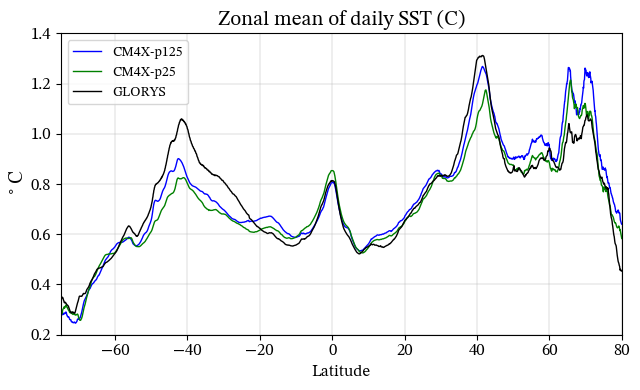

In [18]:
#map zonal mean
vmin=0
vmax=0.5
levels = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0))

plt.plot(static_p125['yh'],tos_std_p125_xave,label='CM4X-p125',color='blue',linewidth=1)
plt.plot(static_p25['yh'],tos_std_p25_xave,label='CM4X-p25',color='green',linewidth=1)
plt.plot(dsglorys['latitude'],tos_std_glorys_xave,label='GLORYS', color='k',linewidth=1)
plt.tick_params(labelsize=12) 
plt.ylabel(r'$^\circ$C',fontsize=14, labelpad=1)
#plt.ylabel('deg C', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title('Zonal mean of daily SST (C)', fontsize=15)
plt.grid(linewidth=0.3)
plt.legend(loc='upper left')
plt.xlim([-75,80])
plt.ylim([0.2,1.4])

plt.tight_layout()
plt.show()
fig.savefig('Fig12_tos_std_xave.jpg', bbox_inches='tight', dpi=400, format='jpeg')

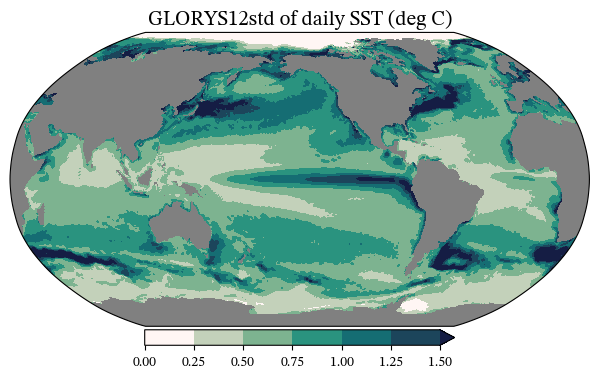

In [19]:
#map glorys
field = tos_std_glorys
vmin=0
vmax=1.5

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.contourf(field, ax=axis, x="geolon", y="geolat",
                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('GLORYS12std of daily SST (deg C)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig12_GLORYS_daily_sst_std.jpg', bbox_inches='tight', format='jpeg', dpi=400)

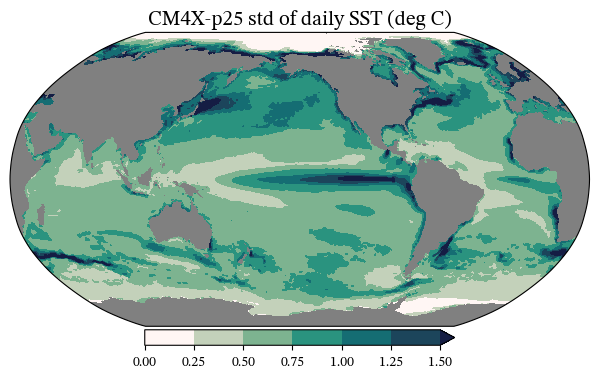

In [20]:
#map p25
field = tos_std_p25
vmin=0
vmax=1.5

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.contourf(field, ax=axis, x="geolon", y="geolat",
                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p25 std of daily SST (deg C)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('fig12_CM4Xp25_daily_sst_std.jpg', bbox_inches='tight', format='jpeg', dpi=400)

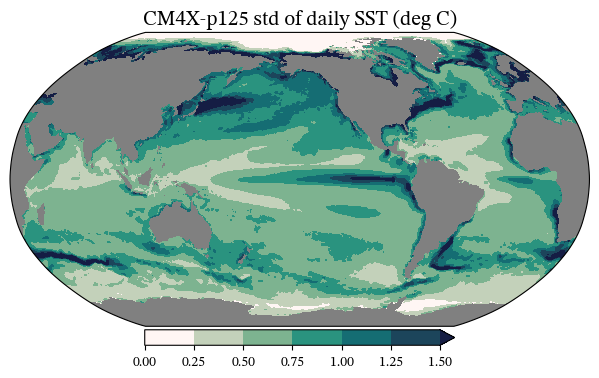

In [21]:
#map p125
field = tos_std_p125
vmin=0
vmax=1.5

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.contourf(field, ax=axis, x="geolon", y="geolat",
                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False,
            )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 std of daily SST (deg C)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig12_CM4Xp125_daily_sst_std.jpg', bbox_inches='tight', format='jpeg', dpi=400)
